In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist

GAN的关键思想类似于“艺术伪造”，是一个创造赝品的过程。GAN同时训练两个神经网络：
1. 鉴别器$D(Y)$：判别输入图像是真实图像还是伪造图像
2. 生成器$G(Z)$：用于生成伪造图像

模型图：

<img src="image\GAN模型.png" alt="GAN" style="width: 500px;">

$D(Y)$获取输入$Y$(例如图像)，用于判断图像是真实图像还是伪造图像。
$G(Z)$获取输入$Z$(例如随机噪声)，用于生成伪造图像。

GAN的学习分为两个步骤：
1. 鉴别器学习
2. 生成器

In [4]:
(X_train, _), (_, _) =mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5 ) / 127.5
X_train = X_train.reshape(60000, 784)

对应生成器，输入是100维的随机噪声，输出是784维的图像。

In [6]:
generator = Sequential()
generator.add(Dense(256, input_dim = 100, activation = 'relu'))
generator.add(layers.LeakyReLU(alpha = 0.2))
generator.add(Dense(512, activation = 'relu'))
generator.add(layers.LeakyReLU(alpha = 0.2))
generator.add(Dense(1024, activation = 'relu'))
generator.add(layers.LeakyReLU(alpha = 0.2))
generator.add(Dense(784, activation = 'tanh'))

对应鉴别器，输入是784维的图像，输出是1维的概率。

In [7]:
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim = 784, activation = 'relu'))
discriminator.add(layers.LeakyReLU(alpha = 0.2))
discriminator.add(layers.Dropout(0.3))
discriminator.add(Dense(512, activation = 'relu'))
discriminator.add(layers.LeakyReLU(alpha = 0.2))
discriminator.add(layers.Dropout(0.3))
discriminator.add(Dense(256, activation = 'relu'))
discriminator.add(layers.LeakyReLU(alpha = 0.2))
discriminator.add(layers.Dropout(0.3))
discriminator.add(Dense(1, activation = 'sigmoid'))


接下来定义GAN模型。

In [8]:
discriminator.trainable = False
gan_input = keras.Input(shape = (100,))
x = generator(gan_input)
ganOutput = discriminator(x)
gan = keras.Model(gan_input, ganOutput)

In [9]:
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')
gan.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [11]:
dLossex = []
gLossex = []

In [12]:
def train(epochs=1, batch_size=128):
    batchCount = int(X_train.shape[0] / batch_size)
    print('Epochs:', epochs)
    print('Batch size:', batch_size)
    print('Batches per epoch:', batchCount)
    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):
            # 获取一组随机输入噪声和图像
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]
            # 生成伪造Mnist图片
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            generatorImages = generator.predict(noise)
            
            X = np.concatenate([imageBatch, generatorImages])
            yDis  = np.zeros(2*batch_size)
            yDis[:batch_size] = 0.9
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)
            
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            yGen = np.ones(batch_size)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)
            dLossex.append(dloss)
            gLossex.append(gloss)
            

In [18]:
def plot_images(epoch):
    plt.figure(figsize=(10,8))
    plt.plot(dLossex, label='Discriminator loss')
    plt.plot(gLossex, label='Generator loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('images/gan_loss_epoch_%d.png'%epoch)

In [19]:
def saveGeneratedImages(epoch, examples = 100, dim = (10, 10), figsize = (10,10)):
    noise = np.random.normal(0, 1, size=[examples, 100])
    generatorImages = generator.predict(noise)
    generatorImages = generatorImages.reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(generatorImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatorImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
        plt.tight_layout()
        # plt.savefig('images/gan_generated_image_epoch_%d.png'%epoch)
        

In [15]:
train(epochs=20, batch_size=128)

Epochs: 20
Batch size: 128
Batches per epoch: 468
--------------- Epoch 1 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 2 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 3 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 4 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 5 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 6 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 7 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 8 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 9 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 10 ---------------
4/4 [==============================] - 0s 2ms/step
--------------- Epoch 11 --------------

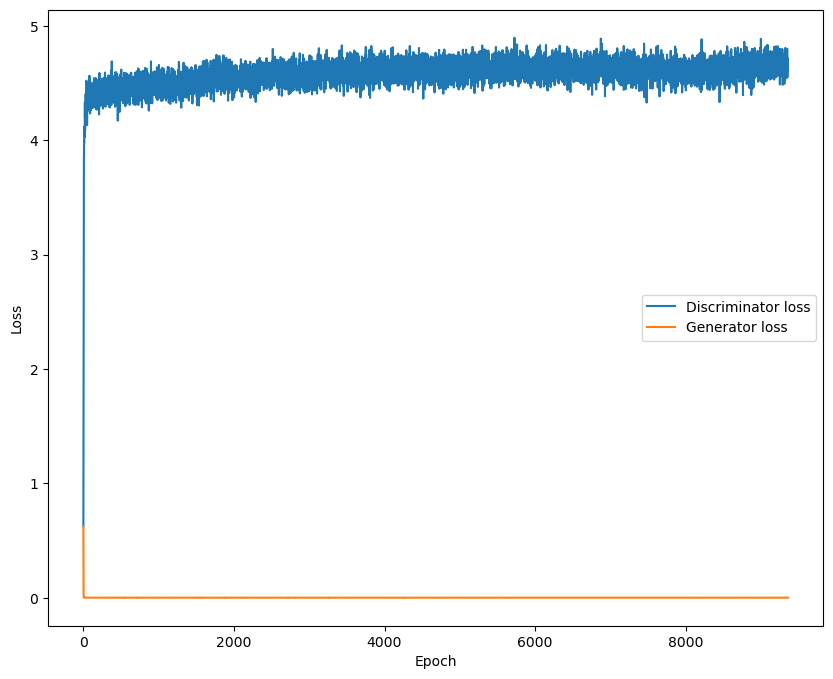

In [20]:
# 画图
plot_images(20)

4/4 [==============================] - 0s 3ms/step


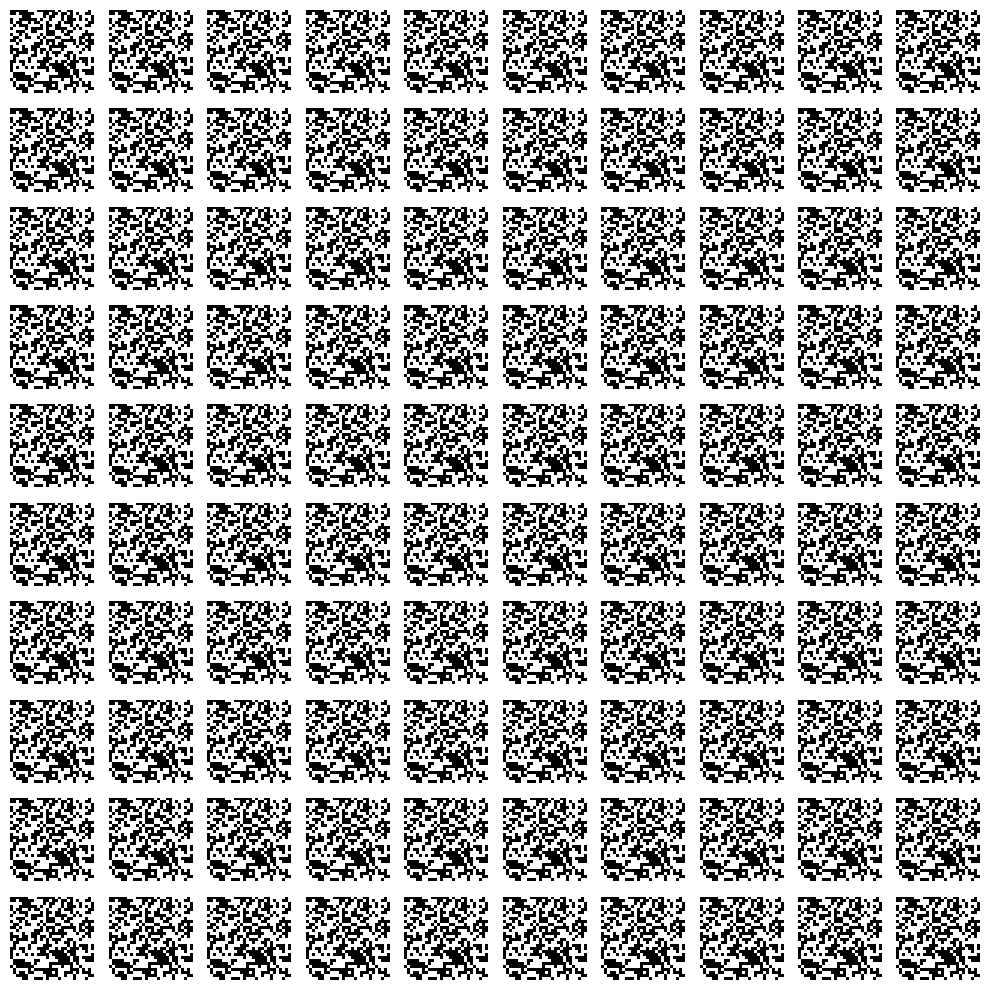

In [21]:
saveGeneratedImages(20)